In [1]:
import csv
import os
import pandas as pd
import numpy as np
import copy
import time
import pickle

from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import RadiusNeighborsClassifier, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, ComplementNB, CategoricalNB


from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.preprocessing import normalize, LabelEncoder, MinMaxScaler

import sklearn.model_selection as model_selection
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, det_curve
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense, Activation, GRU
from sklearn.preprocessing import normalize, LabelEncoder, MinMaxScaler
from sklearn import tree

2022-06-15 08:50:31.624346: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-15 08:50:31.624364: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# usefull fucntions
def remove_nan_values(sample_array:np.array) -> np.array:
    for sample_index, i in enumerate(sample_array):
        for value_index, j in enumerate(i):
            if j==' ':
               sample_array[sample_index][value_index] = 0.0
            elif type(j) == str:
                sample_array[sample_index][value_index] = int(j)
            elif np.isnan(j):
               sample_array[sample_index][value_index] = 0.0
    return sample_array

def remove_1d_array_nan_values(sample_array: np.array, attack_categories: dict) -> np.array:
    for value_index, j in enumerate(sample_array):
        if j==' ':
           sample_array[value_index] = 0.0
        elif type(j) == str:
            try:
                sample_array[value_index] = int(j)
            except:
                sample_array[value_index] = attack_categories[j]
        elif np.isnan(j):
           sample_array[value_index] = 0.0
    return sample_array

def save_model(model, name, prefix) -> None:
    """Function responsible for saving trained model. It must be called
    after defining, training and predict.

    :param: None
    :return: None
    """

    filename = f"{name}_{prefix}.sav"
    pickle.dump(model, open(filename, 'wb'))
    
def load_model(filepath):
    """Function responsible for load model.

    :param: None
    :return: None
    """
    return pickle.load(open(filepath, 'rb'))


# def response_coding(xtrain, ytrain, feature):
#     dictionary = dict()
#     x = pd.DataFrame()
#     x = pd.DataFrame([feature, 'class 1', 'class 0'])

#     unique_cat_labels = xtrain[feature].unique()

#     for i in tqdm(range(len(unique_cat_labels))):
#         total_count = xtrain.loc[:,feature][(xtrain[feature] == unique_cat_labels[i])].count()
#         p_0 = xtrain.loc[:, feature][((xtrain[feature] == unique_cat_labels[i]) & (ytrain==0))].count()
#         p_1 = xtrain.loc[:, feature][((xtrain[feature] == unique_cat_labels[i]) & (ytrain==1))].count()

#         dictionary[unique_cat_labels[i]] = [p_1/total_count, p_0/total_count]

#         row = []
#         row.append(unique_cat_labels[i])
#         row.append(p_1/total_count)
#         row.append(p_0/total_count)
#         x.add_row(row)
#     return dictionary

# Binary classification

## All features UNSW-NB15

In [3]:
accuracy_list = [76.4, 88.8, 90.6, 83.3, 85.1, 83.0, 86.8, 86.6]
precision_list = [77.8, 84.3, 87.5, 77.2, 80.0, 76.8, 81.3, 78.2]
recall_list = [80.0, 97.9, 96.6, 98.7, 97.4, 98.9, 98.5, 99.2]
f1_list = [78.9, 90.6, 91.8, 86.7, 87.8, 86.5, 89.1, 87.5]

results = {'Model': ['NaiveBayes', 'DecisionTree', 'RandomForest', 'MultiLayerPercepton', 'AdaBoost', 'GradientBoost', 'LSTM', 'GRU'],
           'Accuracy [%]': accuracy_list,
           'Precision [%]': precision_list,
           'Recall [%]': recall_list,
           'F1_score [%]': f1_list,
#            'FPR_score [%]': fpr_list
          }
 
# Convert the dictionary into DataFrame 
result_metrics = pd.DataFrame(results)
result_metrics

,Model,Accuracy [%],Precision [%],Recall [%],F1_score [%]
0,NaiveBayes,76.4,77.8,80.0,78.9
1,DecisionTree,88.8,84.3,97.9,90.6
2,RandomForest,90.6,87.5,96.6,91.8
3,MultiLayerPercepton,83.3,77.2,98.7,86.7
4,AdaBoost,85.1,80.0,97.4,87.8
5,GradientBoost,83.0,76.8,98.9,86.5
6,LSTM,86.8,81.3,98.5,89.1
7,GRU,86.6,78.2,99.2,87.5


## All features IoT_Network

In [4]:
accuracy_list = [72.8, 100.0, 98.0, 97.3, 100.0, 100.0, 96.4, 92.3]
precision_list = [56.2, 99.9, 94.6, 93.4, 100.0, 100.0, 92.7, 84.1]
recall_list = [99.6, 100.0, 99.9, 99.4, 100.0, 100.0, 97.3, 95.0]
f1_list = [71.8, 99.9, 97.2, 96.3, 100.0, 100.0, 95.0, 89.8]

results = {'Model': ['NaiveBayes', 'DecisionTree', 'RandomForest', 'MultiLayerPercepton', 'AdaBoost', 'GradientBoost', 'LSTM', 'GRU'],
           'Accuracy [%]': accuracy_list,
           'Precision [%]': precision_list,
           'Recall [%]': recall_list,
           'F1_score [%]': f1_list,
#            'FPR_score [%]': fpr_list
          }
 
# Convert the dictionary into DataFrame 
result_metrics = pd.DataFrame(results)
result_metrics

,Model,Accuracy [%],Precision [%],Recall [%],F1_score [%]
0,NaiveBayes,72.8,56.2,99.6,71.8
1,DecisionTree,100.0,99.9,100.0,99.9
2,RandomForest,98.0,94.6,99.9,97.2
3,MultiLayerPercepton,97.3,93.4,99.4,96.3
4,AdaBoost,100.0,100.0,100.0,100.0
5,GradientBoost,100.0,100.0,100.0,100.0
6,LSTM,96.4,92.7,97.3,95.0
7,GRU,92.3,84.1,95.0,89.8


## Reduced 20 features UNSW-NB15

In [5]:
accuracy_list = [74.9, 87.9, 89.9, 84.6, 85.6, 83.5, 78.8, 82.3]
precision_list = [72.4, 83.4, 86.4, 82.1, 80.9, 77.6, 72.3, 75.8]
recall_list = [88.0, 97.4, 96.9, 92.2, 96.7, 98.4, 99.6, 99.6]
f1_list = [79.4, 89.9, 91.3, 86.8, 88.1, 86.8, 83.8, 86.2]

results = {'Model': ['NaiveBayes', 'DecisionTree', 'RandomForest', 'MultiLayerPercepton', 'AdaBoost', 'GradientBoost', 'LSTM', 'GRU'],
           'Accuracy [%]': accuracy_list,
           'Precision [%]': precision_list,
           'Recall [%]': recall_list,
           'F1_score [%]': f1_list,
#            'FPR_score [%]': fpr_list
          }
 
# Convert the dictionary into DataFrame 
result_metrics = pd.DataFrame(results)
result_metrics

,Model,Accuracy [%],Precision [%],Recall [%],F1_score [%]
0,NaiveBayes,74.9,72.4,88.0,79.4
1,DecisionTree,87.9,83.4,97.4,89.9
2,RandomForest,89.9,86.4,96.9,91.3
3,MultiLayerPercepton,84.6,82.1,92.2,86.8
4,AdaBoost,85.6,80.9,96.7,88.1
5,GradientBoost,83.5,77.6,98.4,86.8
6,LSTM,78.8,72.3,99.6,83.8
7,GRU,82.3,75.8,99.6,86.2


## Reduced 10 features IoT_Network

In [6]:
accuracy_list = [87.3, 99.9, 99.8, 96.8, 100.0, 100.0, 87.6, 88.7]
precision_list = [75.7, 99.9, 99.6, 92.9, 100.0, 100.0, 75.3, 75.9]
recall_list = [93.5, 100.0, 99.8, 98.3, 100.0, 100.0, 95.6, 98.9]
f1_list = [83.6, 99.9, 99.7, 95.5, 100.0, 100.0, 84.2, 85.9]

results = {'Model': ['NaiveBayes', 'DecisionTree', 'RandomForest', 'MultiLayerPercepton', 'AdaBoost', 'GradientBoost', 'LSTM', 'GRU'],
           'Accuracy [%]': accuracy_list,
           'Precision [%]': precision_list,
           'Recall [%]': recall_list,
           'F1_score [%]': f1_list,
#            'FPR_score [%]': fpr_list
          }
 
# Convert the dictionary into DataFrame 
result_metrics = pd.DataFrame(results)
result_metrics

,Model,Accuracy [%],Precision [%],Recall [%],F1_score [%]
0,NaiveBayes,87.3,75.7,93.5,83.6
1,DecisionTree,99.9,99.9,100.0,99.9
2,RandomForest,99.8,99.6,99.8,99.7
3,MultiLayerPercepton,96.8,92.9,98.3,95.5
4,AdaBoost,100.0,100.0,100.0,100.0
5,GradientBoost,100.0,100.0,100.0,100.0
6,LSTM,87.6,75.3,95.6,84.2
7,GRU,88.7,75.9,98.9,85.9


## Decision Trees

In [8]:
dataset_testing_path = '/home/mkubita/Pulpit/Praca Magisterska/Zbiory danych/UNSW-NB15/UNSW-NB15 - CSV Files/Splitted_Dataset/UNSW_NB15_testing-set.csv'
dataset_traning_path = '/home/mkubita/Pulpit/Praca Magisterska/Zbiory danych/UNSW-NB15/UNSW-NB15 - CSV Files/Splitted_Dataset/UNSW_NB15_training-set.csv'


dataset_features_path = '/home/mkubita/Pulpit/Praca Magisterska/Zbiory danych/UNSW-NB15/UNSW-NB15 - CSV Files/NUSW-NB15_features.csv'

features_columns = pd.read_csv(dataset_features_path, sep=",", encoding='cp1252')
features_list = list(features_columns['Name'])

In [9]:
# load data to pandas DataFrame
df_training = pd.read_csv(dataset_traning_path, index_col=None, header=0)
df_training = df_training.drop(df_training.columns[0], axis=1)

df_testing = pd.read_csv(dataset_testing_path, index_col=None, header=0)
df_testing = df_testing.drop(df_testing.columns[0], axis=1)

In [10]:
# features list
features_list = list(df_training.columns)
features_list.remove('attack_cat')
features_list.remove('label')

In [11]:
# categorical values
categorical_features = ['state', 'proto', 'service']

for categorical_feature in categorical_features:
    test_list = list(df_testing[features_list][categorical_feature].unique())

    label_encoding = {name: index for index, name in enumerate(list(df_training[features_list][categorical_feature].unique()))}
    for i in test_list:
        if i not in label_encoding.keys():
            label_encoding[i] = max(label_encoding.values()) + 1
    
    
    for name, value in label_encoding.items():
        df_training[features_list]= df_training[features_list].replace(name, value)
        df_testing[features_list]= df_testing[features_list].replace(name, value)


In [12]:
# prepare data for classification
x_train = df_training[features_list].to_numpy()
y_train = df_training['label'].to_numpy()

x_test = df_testing[features_list].to_numpy()
y_test = df_testing['label'].to_numpy()

# remove nan values
x_train = remove_nan_values(x_train)
x_test = remove_nan_values(x_test)

# normalization min max
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [13]:
dt_model = DecisionTreeClassifier(criterion="entropy",
                                 class_weight="balanced",
                                 random_state=10,
                                 max_depth=20,
                                 max_leaf_nodes=162,
                                 min_samples_leaf=20,
                                 min_impurity_decrease=0.00006,
                                 min_samples_split=2)

dt_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, max_leaf_nodes=162,
                       min_impurity_decrease=6e-05, min_samples_leaf=20,
                       random_state=10)

## All features UNSW-NB15

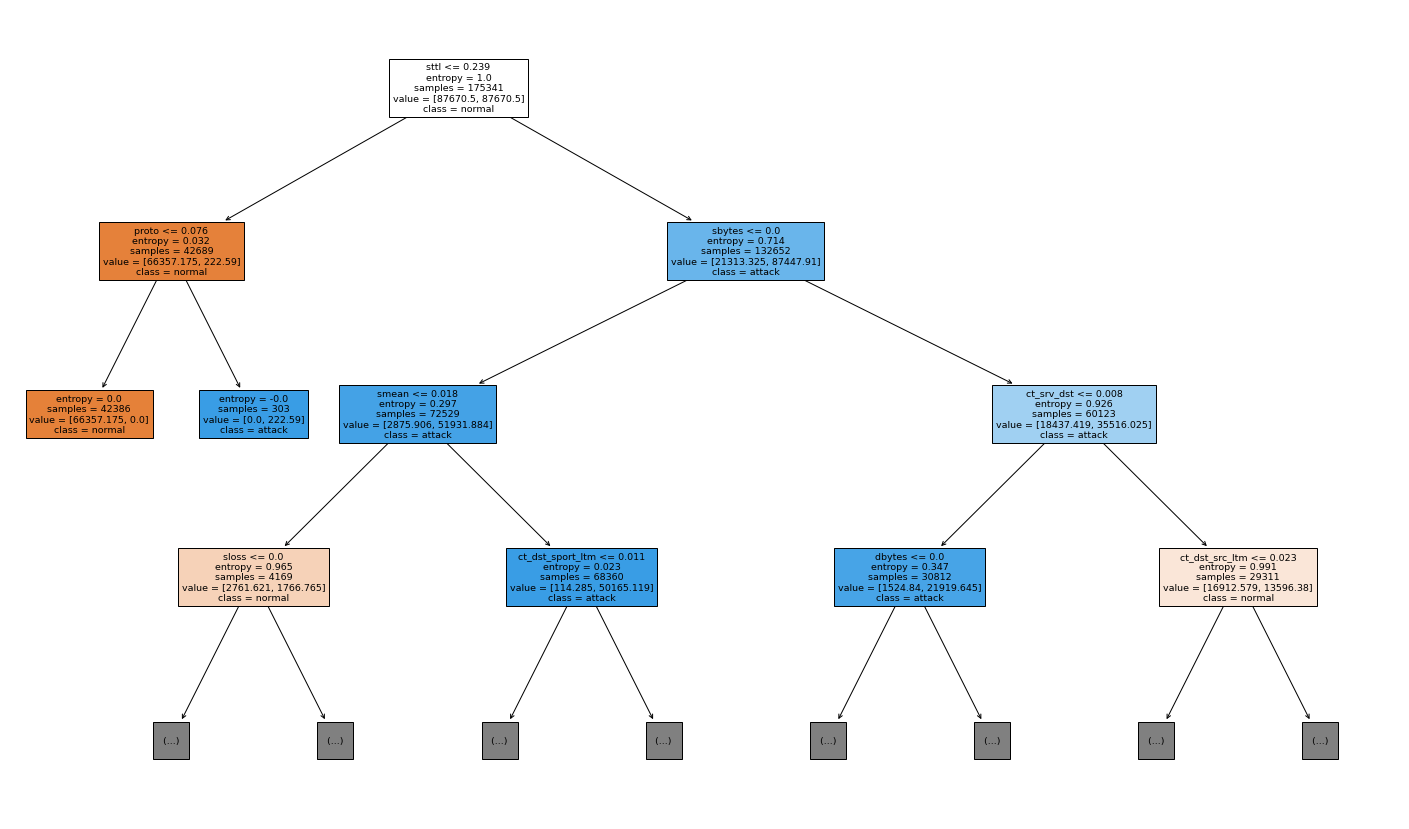

In [16]:
plt.figure(figsize=(25, 15))
tree.plot_tree(dt_model, max_depth=3, feature_names=features_list, filled=True, class_names=['normal', 'attack'])
plt.show()

## Reduced UNSW-NB15

In [17]:
chosen_features = ['sttl', 'ct_state_ttl', 'sload', 'rate', 'dload', 'dttl', 'sbytes', 'ct_srv_dst', 'smean', 
                  'dmean', 'dbytes', 'ackdat', 'ct_dst_src_ltm', 'ct_srv_src', 'dur', 'tcprtt', 'synack',
                  'dinpkt', 'sinpkt', 'dpkts']
# prepare data for classification
x_train_reduced_bin = df_training[features_list][chosen_features].to_numpy()
y_train_reduced_bin = df_training['label'].to_numpy()

x_test_reduced_bin = df_testing[features_list][chosen_features].to_numpy()
y_test_reduced_bin = df_testing['label'].to_numpy()

# remove nan values
x_train_reduced_bin = remove_nan_values(x_train_reduced_bin)
x_test_reduced_bin = remove_nan_values(x_test_reduced_bin)

# normalization min max
scaler = MinMaxScaler()
x_train_reduced_bin = scaler.fit_transform(x_train_reduced_bin)
x_test_reduced_bin = scaler.fit_transform(x_test_reduced_bin)

In [18]:
dt_model2 = DecisionTreeClassifier(criterion="entropy",
                                 class_weight="balanced",
                                 random_state=10,
                                 max_depth=20,
                                 max_leaf_nodes=162,
                                 min_samples_leaf=20,
                                 min_impurity_decrease=0.00006,
                                 min_samples_split=2)

dt_model2.fit(x_train_reduced_bin, y_train_reduced_bin)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, max_leaf_nodes=162,
                       min_impurity_decrease=6e-05, min_samples_leaf=20,
                       random_state=10)

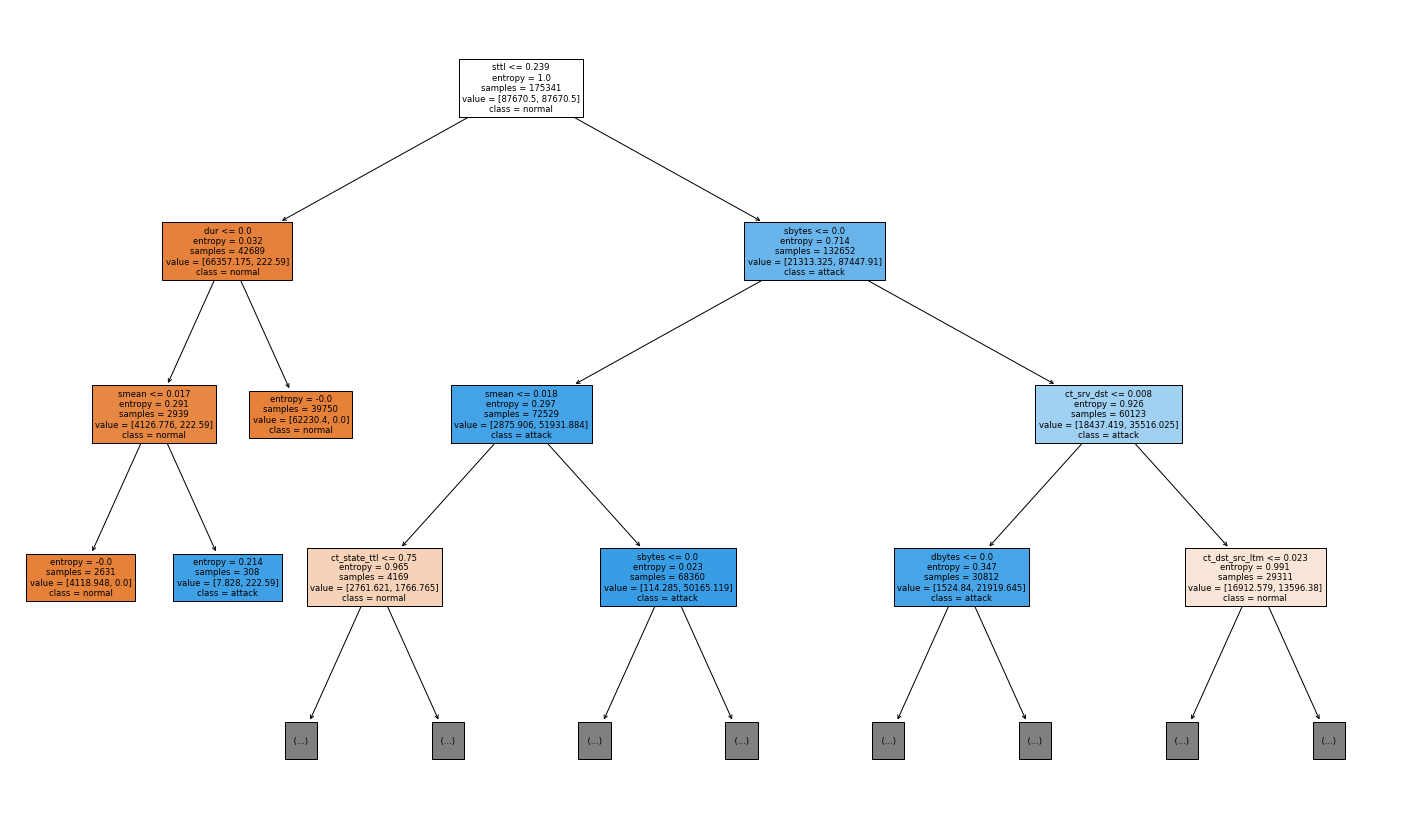

In [19]:
plt.figure(figsize=(25, 15))
tree.plot_tree(dt_model2, max_depth=3, feature_names=chosen_features, filled=True, class_names=['normal', 'attack'])
plt.show()

## IoT_Network

In [20]:
# load data to pandas DataFrame
df_path = '/home/mkubita/Pulpit/Praca Magisterska/Zbiory danych/TON_IoT/Train_Test_datasets/Train_Test_Network_dataset/Train_Test_Network.csv'
df = pd.read_csv(df_path, index_col=None, header=0)


features = list(df.columns)

for i in ['src_ip', 'src_port', 'dst_ip', 'dst_port', 'label', 'type']:
    features.remove(i)
    
    
# categorical features
cat_features = ['conn_state', 'proto', 'service', 'dns_query', 'ssl_version', 'ssl_cipher', 'ssl_subject', 'ssl_issuer', 'http_method', 'http_uri', 'http_version', 'http_orig_mime_types', 'http_resp_mime_types', 'weird_name', 'weird_addl', 'weird_notice', 'http_user_agent', 'dns_rcode','dns_AA', 'dns_RD', 'dns_RA', 'dns_rejected', 'ssl_established', 'ssl_resumed', 'http_trans_depth']
for i in cat_features:
    encoder = LabelEncoder()
    df[i] = encoder.fit_transform(df[i])
    
    
# prepare data for classification
df = df.dropna()

x = df[features].to_numpy()
y = df['label'].to_numpy()

# normalization min max
scaler = MinMaxScaler()
x = scaler.fit_transform(x)



# split data
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y,
                                                                    train_size=0.80,
                                                                    test_size=0.20,
                                                                    random_state=101)

In [21]:
dt_model_iot = DecisionTreeClassifier(criterion="entropy",
                                 class_weight="balanced",
                                 random_state=10,
                                 max_depth=20,
                                 max_leaf_nodes=162,
                                 min_samples_leaf=20,
                                 min_impurity_decrease=0.00006,
                                 min_samples_split=2)

dt_model_iot.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, max_leaf_nodes=162,
                       min_impurity_decrease=6e-05, min_samples_leaf=20,
                       random_state=10)

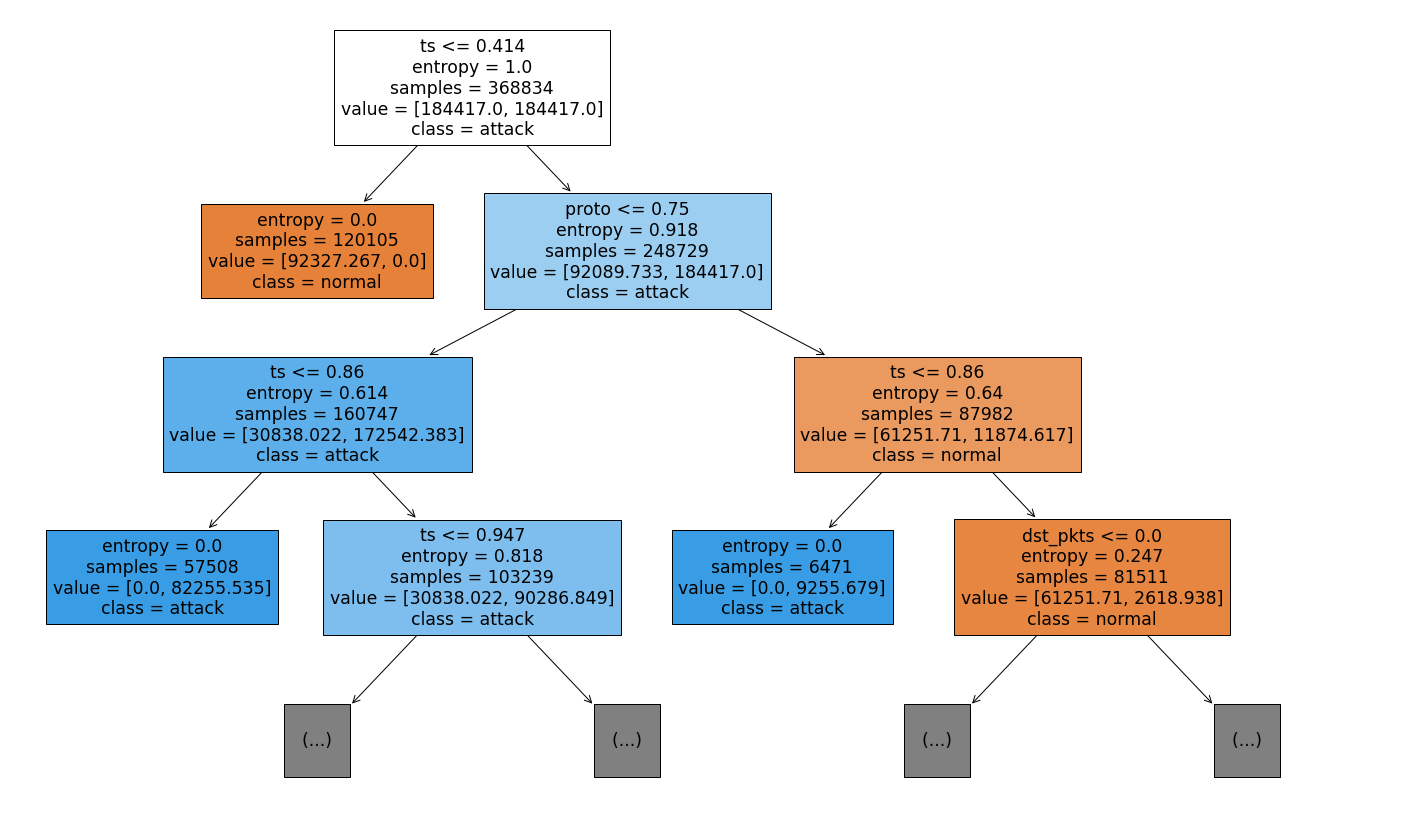

In [23]:
plt.figure(figsize=(25, 15))
tree.plot_tree(dt_model_iot, max_depth=3, feature_names=features, filled=True, class_names=['normal', 'attack'])
plt.show()

In [32]:
reduced_features = ['ts', 'proto', 'src_ip_bytes', 'src_pkts', 'dst_ip_bytes', 'dst_pkts', 'conn_state', 'dst_bytes', 'src_bytes', 'duration']


# prepare data for classification

x_reduced = df[features][reduced_features].to_numpy()
y_reduced = df['label'].to_numpy()

# normalization min max
scaler = MinMaxScaler()
x_reduced = scaler.fit_transform(x_reduced)


# split data
x_reduced_train, x_reduced_test, y_reduced_train, y_reduced_test = model_selection.train_test_split(x_reduced, y_reduced,
                                                                    train_size=0.80,
                                                                    test_size=0.20,
                                                                    random_state=101)

In [33]:
dt_model_iot2 = DecisionTreeClassifier(criterion="entropy",
                                 class_weight="balanced",
                                 random_state=10,
                                 max_depth=20,
                                 max_leaf_nodes=162,
                                 min_samples_leaf=20,
                                 min_impurity_decrease=0.00006,
                                 min_samples_split=2)

dt_model_iot2.fit(x_reduced_train, y_reduced_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, max_leaf_nodes=162,
                       min_impurity_decrease=6e-05, min_samples_leaf=20,
                       random_state=10)

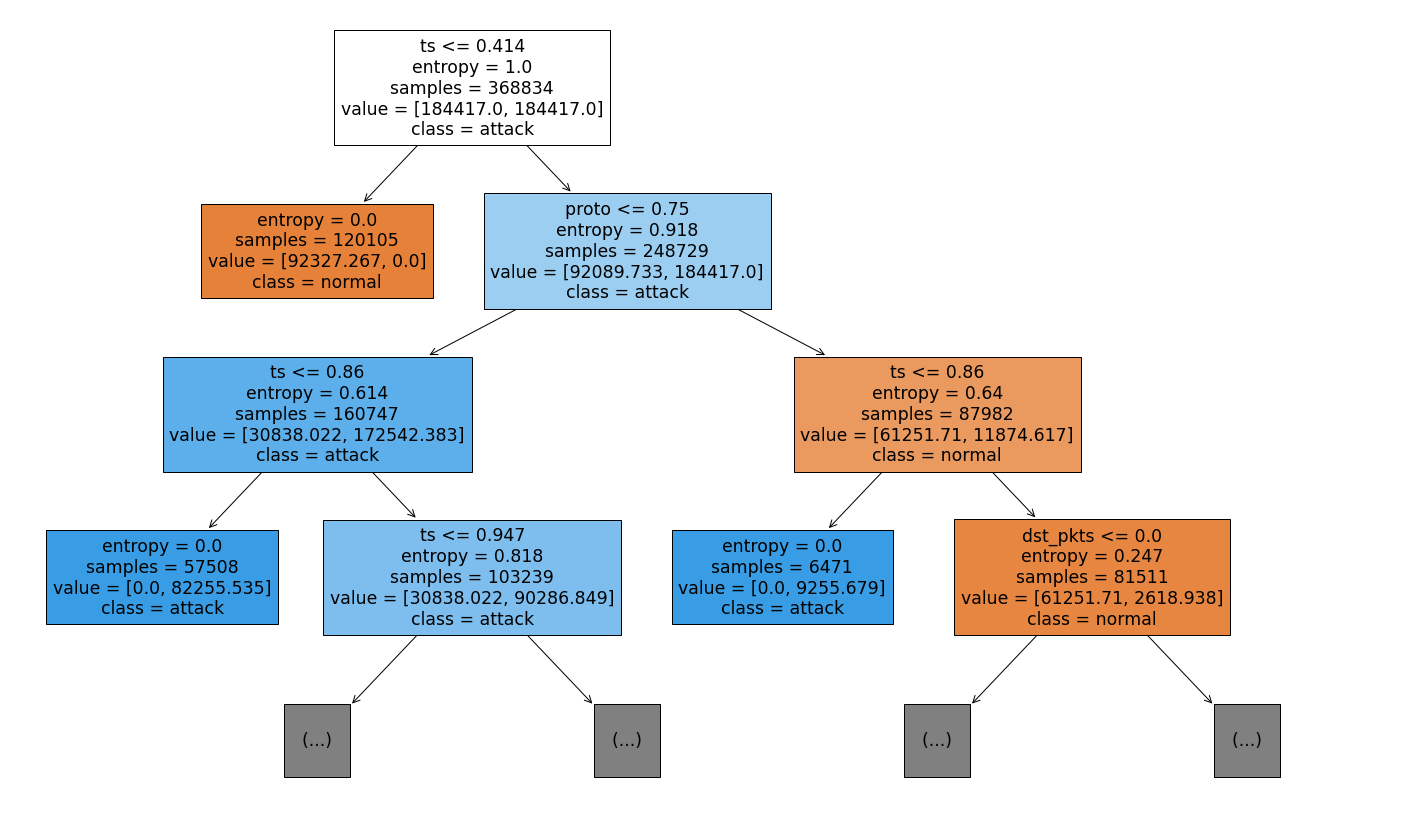

In [34]:
plt.figure(figsize=(25, 15))
tree.plot_tree(dt_model_iot2, max_depth=3, feature_names=reduced_features, filled=True, class_names=['normal', 'attack'])
plt.show()

In [31]:
prediction_gru2 = dt_model_iot2.predict(x_reduced_test)
prediction_gru2 = prediction_gru2.flatten()
prediction_gru2 = [int(round(i,0)) for i in prediction_gru2]

accuracy = accuracy_score(y_reduced_test, prediction_gru2)
precision = precision_score(y_reduced_test, prediction_gru2, average='binary')
recall = recall_score(y_reduced_test, prediction_gru2, average='binary')
f1_ = f1_score(y_reduced_test, prediction_gru2, average='binary')

print(accuracy, precision, recall, f1_)

0.9652420045765597 0.9428527654358817 0.9582684521955777 0.9504981079620047


In [ ]:
models_mlp = [MLPClassifier(hidden_layer_sizes=(50,),
                solver="adam",
                activation="relu",
                learning_rate_init=0.002,
                learning_rate="adaptive",
                max_iter=2000
               ),
             MLPClassifier(hidden_layer_sizes=(50,50),
                solver="adam",
                activation="relu",
                learning_rate_init=0.002,
                learning_rate="adaptive",
                max_iter=2000
               ),
            MLPClassifier(hidden_layer_sizes=(50,50,50),
                solver="adam",
                activation="relu",
                learning_rate_init=0.002,
                learning_rate="adaptive",
                max_iter=2000
               ),
            MLPClassifier(hidden_layer_sizes=(50,30,10),
                solver="adam",
                activation="relu",
                learning_rate_init=0.002,
                learning_rate="adaptive",
                max_iter=2000
               ),
             MLPClassifier(hidden_layer_sizes=(100,100),
                solver="adam",
                activation="relu",
                learning_rate_init=0.002,
                learning_rate="adaptive",
                max_iter=2000
               ),
            MLPClassifier(hidden_layer_sizes=(100,100,100),
                solver="adam",
                activation="relu",
                learning_rate_init=0.002,
                learning_rate="adaptive",
                max_iter=2000
               ),
            MLPClassifier(hidden_layer_sizes=(100,50,20),
                solver="adam",
                activation="relu",
                learning_rate_init=0.002,
                learning_rate="adaptive",
                max_iter=2000
               ),
             MLPClassifier(hidden_layer_sizes=(200,100, 50, 25),
                solver="adam",
                activation="relu",
                learning_rate_init=0.002,
                learning_rate="adaptive",
                max_iter=2000
               ),
            MLPClassifier(hidden_layer_sizes=(200,200,200),
                solver="adam",
                activation="relu",
                learning_rate_init=0.002,
                learning_rate="adaptive",
                max_iter=2000
               ),
            MLPClassifier(hidden_layer_sizes=(300,150,75),
                solver="adam",
                activation="relu",
                learning_rate_init=0.002,
                learning_rate="adaptive",
                max_iter=2000
               )
             ]